In [3]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

# plt pdf font 
plt.rcParams['pdf.fonttype'] = 42

In [4]:
ct_interactions = {}
cell_types = ['Astro', 'Exc_deep', 'Exc_int', 'Exc_upper', 'Inh', 'Microglia', 'Oligo', 'OPC']
filters_root = '/home/aiden/codes/APA_stuff/APA_ALS_paper_rev_2024/filter_interactions'
for ct in cell_types:
    ct_interactions[ct] = pd.read_csv(os.path.join(filters_root, f'{ct}_corr.csv'), index_col=0)
    
ct_interactions['Astro'].head()
    
    

,A1CF,ANKHD1,ARID4A,CELF3,CELF4,CELF5,CELF6,CNOT4,CPEB2,CPEB4,...,TARDBP,TIA1,TUT1,U2AF2,YBX1,YBX2,ZC3H10,ZC3H14,ZCRB1,ZNF638
RBP,,,,,,,,,,,,,,,,,,,,,
A1CF,1.000000,-0.091062,-0.176087,0.608557,0.624115,0.402482,0.592273,-0.062823,0.412420,0.388479,...,0.099850,0.467877,0.382138,0.388094,-0.129712,-0.005506,-0.100449,0.571604,0.098934,0.448325
ANKHD1,-0.091062,1.000000,0.563962,0.288027,0.128265,0.207106,0.107753,0.495632,0.272726,0.268180,...,0.148847,0.252406,-0.197663,0.228611,0.471290,0.341475,0.499432,0.192422,-0.183523,0.127383
ARID4A,-0.176087,0.563962,1.000000,-0.087635,0.002497,0.078854,-0.045391,0.678795,0.034163,0.011597,...,0.175068,-0.025106,-0.165786,-0.036867,0.655396,0.556844,0.610152,-0.115091,-0.332933,-0.156294
CELF3,0.608557,0.288027,-0.087635,1.000000,0.742577,0.567233,0.635901,0.042939,0.708691,0.728583,...,0.140985,0.774774,0.197833,0.728994,0.059492,0.050787,0.049945,0.816601,0.024512,0.672993
CELF4,0.624115,0.128265,0.002497,0.742577,1.000000,0.864945,0.723969,0.034926,0.609935,0.612177,...,0.246059,0.657094,0.193247,0.570399,0.060943,0.059073,0.047890,0.729240,-0.049929,0.558985


In [6]:
# change NAN values to 0
for ct in ct_interactions:
    ct_interactions[ct] = ct_interactions[ct].fillna(0)



# Create an empty dissimilarity matrix
num_cts = len(cell_types)
dissimilarity_matrix = np.zeros((num_cts, num_cts))

# Compute the Frobenius norm for the difference between each pair of correlation matrices
for i, ct1 in enumerate(cell_types):
    for j, ct2 in enumerate(cell_types):
        if i < j:
            diff = ct_interactions[ct1] - ct_interactions[ct2]
            frobenius_norm = np.linalg.norm(diff, 'fro')
            dissimilarity_matrix[i, j] = frobenius_norm
            dissimilarity_matrix[j, i] = frobenius_norm 

In [19]:
# colorRampPalette(c("#4979B6", "white", "#D73027"))(50)
from matplotlib.colors import LinearSegmentedColormap
colors = ["#4979B6", "white", "#D73027"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=50)

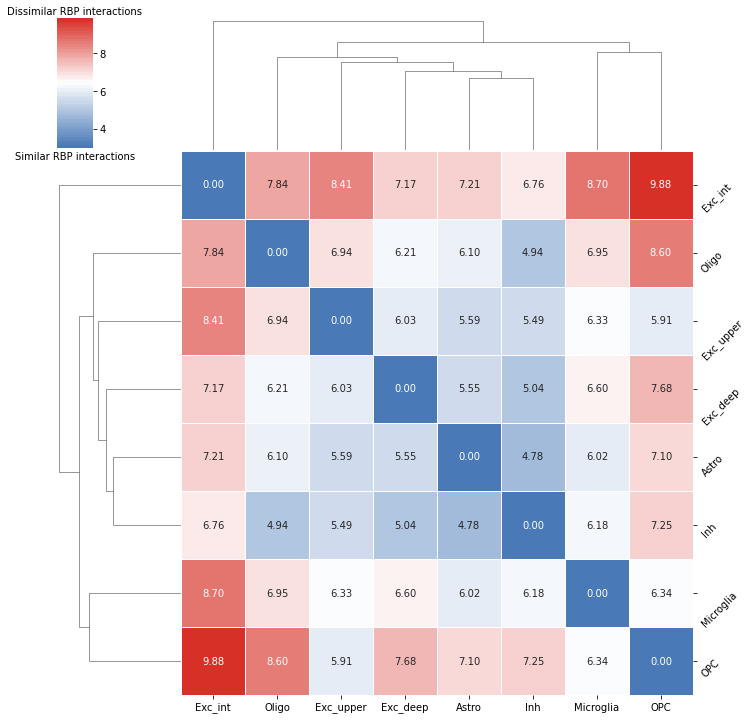

In [32]:
# cmap = sns.color_palette("vlag", as_cmap=True)
# Define the colormap

# Adjust the figsize of the plot
figsize = (10, 10)  # Adjust the values as needed

# Create the clustered heatmap
g = sns.clustermap(dissimilarity_matrix, annot=True, fmt='.2f', cmap=cmap,
                   xticklabels=cell_types, yticklabels=cell_types, cbar=True, linewidths=0.5,
                   vmin=3,figsize=figsize)

# Rotate y-tick labels
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=45)

# Adding text annotations for the color bar legend
plt.text(0.5, 1.05, 'Dissimilar RBP interactions', ha='center', va='center', transform=g.cax.transAxes)
plt.text(0.5, -0.07, 'Similar RBP interactions', ha='center', va='center', transform=g.cax.transAxes)

# Save the plot to a high-resolution PDF
# plt.savefig('RBP_dissimilarity_?heatmap.pdf', dpi=300, bbox_inches='tight', format='pdf')

plt.show()
